**Table of contents**<a id='toc0_'></a>    
- [Q1](#toc1_1_)    
  - [Q3](#toc1_2_)    
  - [Q4](#toc1_3_)    
  - [Q5](#toc1_4_)    
  - [Q6](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import RANKModel 
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

In [2]:
model = RANKModel.NKModelClass(name='baseline')
model.find_ss()

In [ ]:
model.test_path()

shocks: Z beta eps_i G 
unknowns: C P Y w 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.NK_block
  i                0.0e+00
  pi               0.0e+00
  Euler            0.0e+00 [target]
  r                1.1e-16
  N                0.0e+00
  mc               0.0e+00
  goods_mkt        0.0e+00 [target]
  NKPC             0.0e+00 [target]
  Labor_supply     0.0e+00 [target]
  profits          0.0e+00
  LT               0.0e+00
  A                0.0e+00
  B                0.0e+00


## <a id='toc1_1_'></a>[Q1](#toc0_)

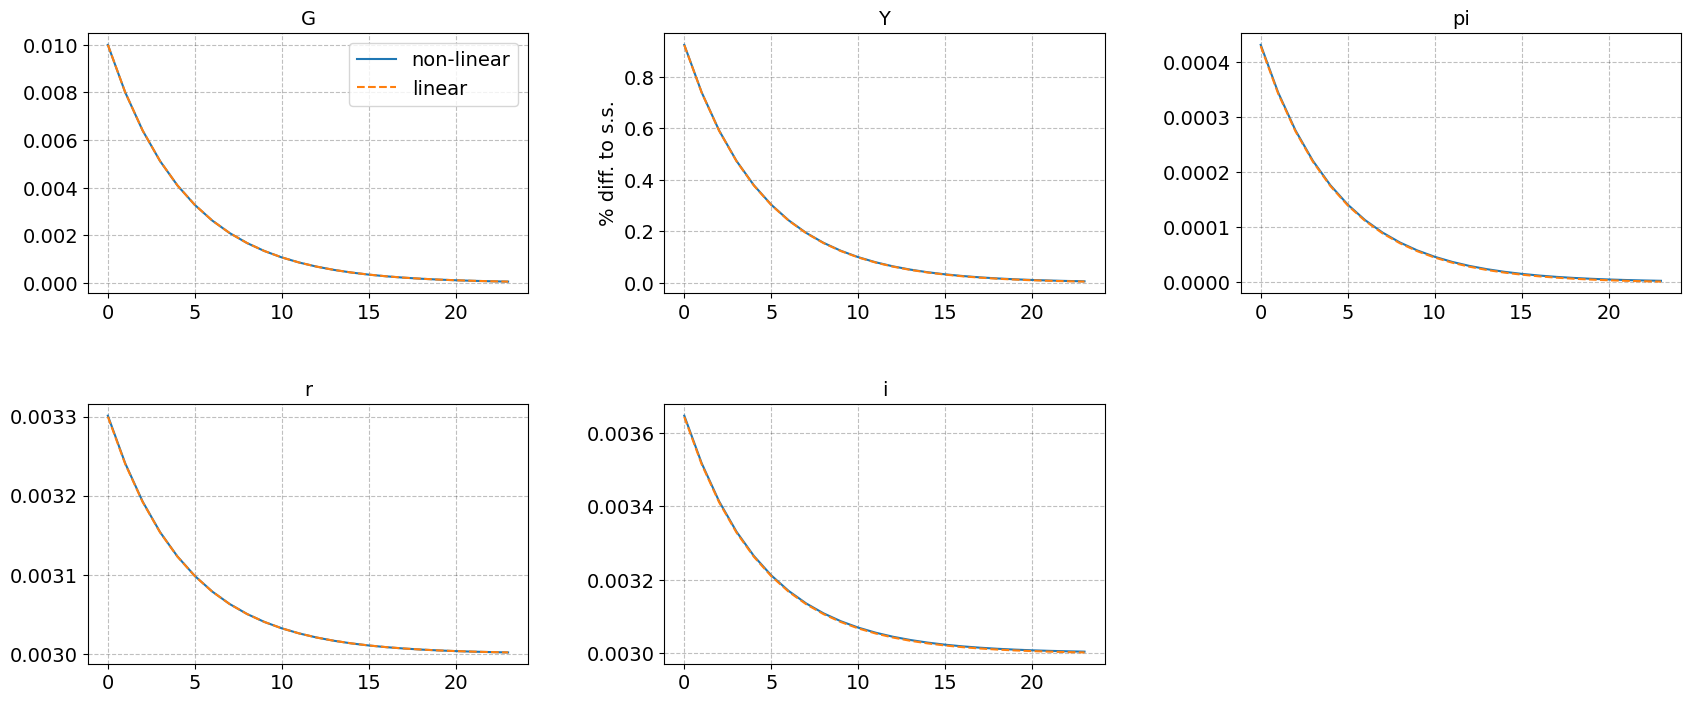

In [9]:
model.compute_jacs()
model.find_transition_path(shocks=['G'],do_print=False, do_end_check=False)
model.find_IRFs(shocks=['G'],do_print=False)
paths = ['G', 'Y', 'pi', 'r','i']
model.show_IRFs(paths,lvl_value=['pi','r','i','G'], T_max=24,ncols=3,do_linear=True, do_shocks=False, do_targets=False)

In [ ]:
Fiscal_mult_lin = (np.sum(model.IRF['Y'][:4])) / (np.sum(model.IRF['G'][:4]))
Fiscal_mult_nonlin = (np.sum(model.path.Y[:4]-model.ss.Y)) / (np.sum(model.path.G[:4] - model.ss.G))

print(f'Fiscal multiplier over the first year (linear): {Fiscal_mult_lin:.2f}')
print(f'Fiscal multiplier over the first year (non-linear): {Fiscal_mult_nonlin:.2f}')

Fiscal multiplier over the first year (linear): 0.92
Fiscal multiplier over the first year (non-linear): 0.93


## <a id='toc1_2_'></a>[Q3](#toc0_)

In [13]:
model_ZLB = model.copy()
model_ZLB.par.ZLB = True 
model_ZLB.compute_jacs()

P: terminal value is   0.94912969, but ss value is   1.00000000


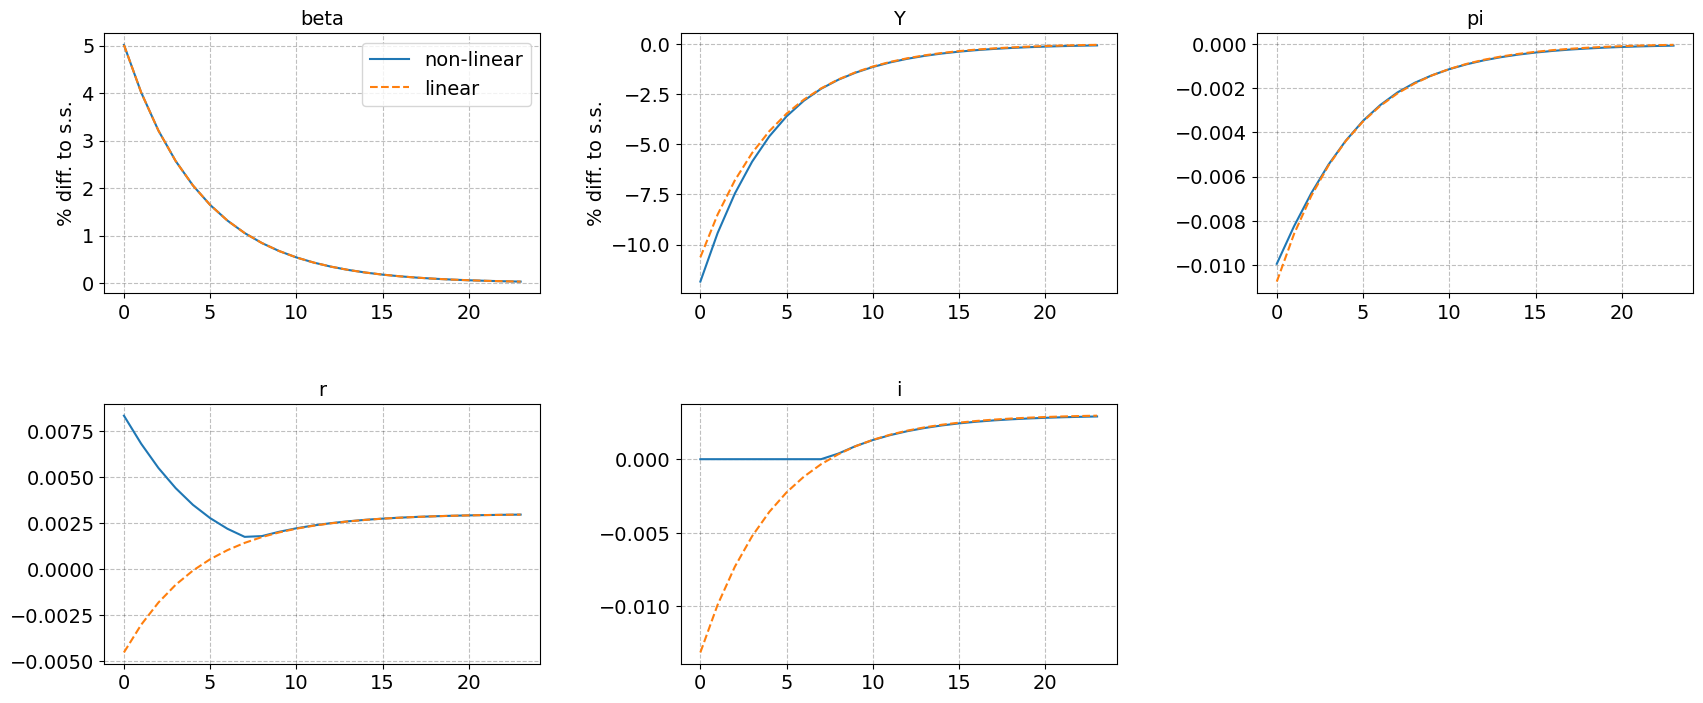

In [ ]:
model_ZLB.find_transition_path(shocks=['beta'],do_print=False)
model_ZLB.find_IRFs(shocks=['beta'],do_print=False)
paths = ['beta', 'Y', 'pi', 'r','i']
model_ZLB.show_IRFs(paths,lvl_value=['pi','r','i','G'], T_max=24,ncols=3,do_linear=True, do_shocks=False, do_targets=False)

## <a id='toc1_3_'></a>[Q4](#toc0_)

P: terminal value is   0.95523885, but ss value is   1.00000000


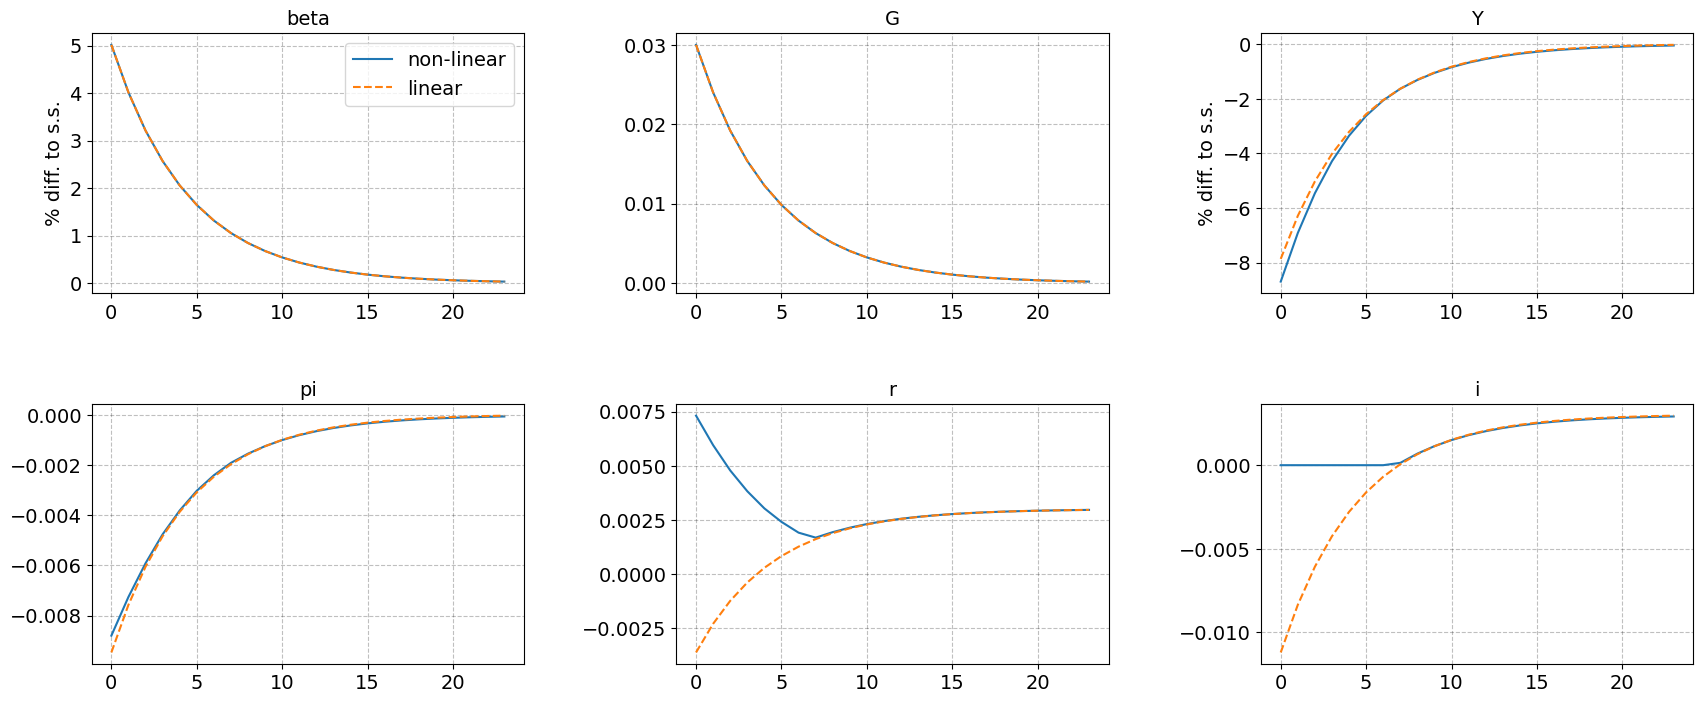

In [ ]:
model_ZLB_G = model_ZLB.copy()
model_ZLB_G.par.jump_G = 0.03  
model_ZLB_G.find_transition_path(shocks=['beta', 'G'],do_print=False)
model_ZLB_G.find_IRFs(shocks=['beta', 'G'],do_print=False)
paths = ['beta', 'G', 'Y', 'pi', 'r','i']
model_ZLB_G.show_IRFs(paths,lvl_value=['pi','r', 'i', 'G'], T_max=24,ncols=3,do_linear=True, do_shocks=False, do_targets=False)

## <a id='toc1_4_'></a>[Q5](#toc0_)

Also need effect without ZLB

P: terminal value is   0.95832291, but ss value is   1.00000000


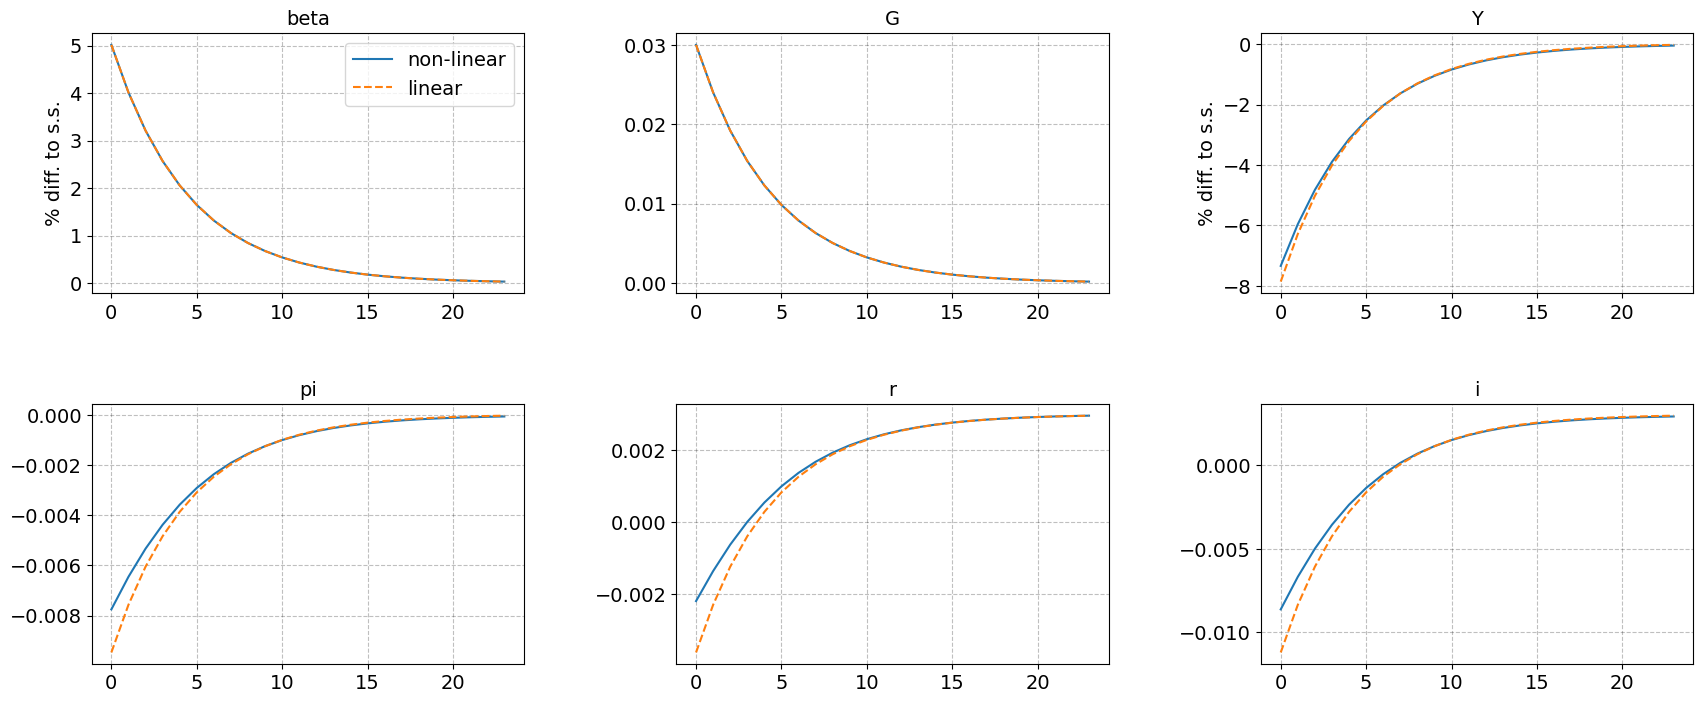

In [18]:
model_G = model_ZLB_G.copy()
model_G.par.ZLB = False 
model_G.find_transition_path(shocks=['beta', 'G'],do_print=False)
model_G.find_IRFs(shocks=['beta', 'G'],do_print=False)
model_G.show_IRFs(paths,lvl_value=['pi','r', 'i', 'G'], T_max=24,ncols=3,do_linear=True, do_shocks=False, do_targets=False)

Compute multipliers

In [ ]:
dY = model_G.path.Y - model.path.Y 
Fiscal_mult_NO_ZLB = (np.sum(dY[:4])) / (np.sum(model_G.path.G[:4]))

dY_ZLB = model_ZLB_G.path.Y - model_ZLB.path.Y 
Fiscal_mult_ZLB = (np.sum(dY_ZLB[:4])) / (np.sum(model_ZLB_G.path.G[:4]))

print(f'Fiscal multiplier (no ZLB) {Fiscal_mult_NO_ZLB:.2f}')
print(f'Fiscal multiplier (ZLB) {Fiscal_mult_ZLB:.2f}')

Fiscal multiplier (no ZLB) 0.94
Fiscal multiplier (ZLB) 1.04


## <a id='toc1_5_'></a>[Q6](#toc0_)

In [20]:
model.par.std_eps_i = 0.01 # controls size of shocks in simulation 
model.par.jump_eps_i = 0.01 # controls size of shock to AR(1) IRF 
model.compute_jacs()

Variance using impulse response

In [40]:
model.find_IRFs(shocks=['eps_i'],do_print=False)
dC_var = 100*np.sum(model.IRF['C']**2)
print(f'{dC_var:.3f}')

0.124


Variance using simulated path

simulation prepared in 0.1 secs [solution matrix: 0.1 secs]
aggregates simulated in 0.3 secs


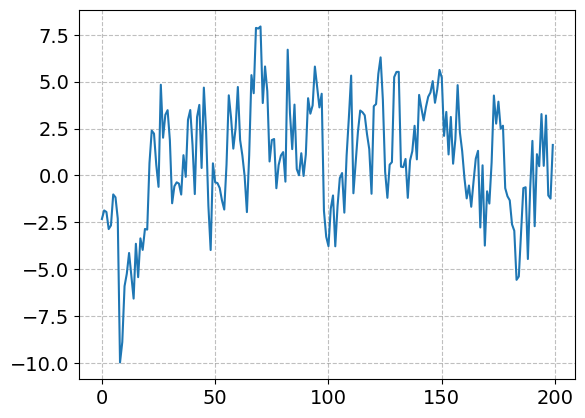

In [22]:
np.random.seed(1917)
model.simulate(do_print=True, skip_hh=True)
plt.plot(100*model.sim.dC[500:700])
plt.show()

In [23]:
dC_var_sim = 100*np.var(model.sim.dC)
print(f'{dC_var_sim:.3f}')

0.125
